In [45]:
import pandas as pd
import numpy as np
import random

# Constants for dataset
sales_reps = ["Rep A", "Rep B", "Rep C", "Rep D"]
activity_types = ["Email", "Call", "Meeting", "Demo"]
stages = ["Prospecting", "Qualified", "Proposal", "Closed Won", "Closed Lost"]
regions = ["North America", "Europe", "Asia", "South America"]

# Generating data
np.random.seed(42)
num_records = 200

data = {
    "Opportunity_ID": [f"OPP{i:05d}" for i in range(1, num_records + 1)],
    "Sales_Rep": np.random.choice(sales_reps, num_records),
    "Region": np.random.choice(regions, num_records),
    "Activity_Type": np.random.choice(activity_types, num_records),
    "Engagement_Score": np.random.randint(1, 100, num_records),
    "Deal_Size": np.random.uniform(5000, 50000, num_records),
    "Stage": np.random.choice(stages, num_records, p=[0.3, 0.3, 0.2, 0.1, 0.1]),
    "Activity_Date": [pd.Timestamp("2024-01-01") + pd.to_timedelta(random.randint(0, 180), unit="d") for _ in range(num_records)]
}

# Create DataFrame
sales_outreach_df = pd.DataFrame(data)

# Save to CSV
sales_outreach_df.to_csv("sales_outreach_data.csv", index=False)

print("Dataset saved as 'sales_outreach_data.csv'")


Dataset saved as 'sales_outreach_data.csv'


In [47]:
sales_outreach_df.info()
# cool so clearly no missing data to fill in

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Opportunity_ID    200 non-null    object        
 1   Sales_Rep         200 non-null    object        
 2   Region            200 non-null    object        
 3   Activity_Type     200 non-null    object        
 4   Engagement_Score  200 non-null    int64         
 5   Deal_Size         200 non-null    float64       
 6   Stage             200 non-null    object        
 7   Activity_Date     200 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 12.6+ KB


In [49]:
sales_outreach_df.describe()
# a quick look at the numerical data

,Engagement_Score,Deal_Size,Activity_Date
count,200.000000,200.000000,200
mean,50.145000,27842.175591,2024-03-27 03:57:36
min,1.000000,5510.914015,2024-01-01 00:00:00
25%,23.000000,15232.147869,2024-02-11 18:00:00
50%,50.500000,27839.631042,2024-03-30 00:00:00
75%,76.000000,40044.804806,2024-05-04 12:00:00
max,99.000000,49987.295298,2024-06-29 00:00:00
std,29.963864,13704.913877,NaN


In [51]:
sales_outreach_df.head()

,Opportunity_ID,Sales_Rep,Region,Activity_Type,Engagement_Score,Deal_Size,Stage,Activity_Date
0,OPP00001,Rep C,Asia,Demo,96,8274.335286,Qualified,2024-01-09
1,OPP00002,Rep D,South America,Demo,94,41983.702668,Prospecting,2024-02-27
2,OPP00003,Rep A,Asia,Meeting,47,36780.900222,Prospecting,2024-03-05
3,OPP00004,Rep C,North America,Email,99,8660.695129,Qualified,2024-04-14
4,OPP00005,Rep C,South America,Demo,55,8817.697134,Prospecting,2024-03-26


In [53]:
activity_engagement = sales_outreach_df.groupby("Activity_Type")["Engagement_Score"].mean()
display(activity_engagement)

Activity_Type
Call       55.566038
Demo       54.603448
Email      40.170213
Meeting    48.309524
Name: Engagement_Score, dtype: float64

In [55]:
# average and total deal size by stage
stage_deal_totals = sales_outreach_df.groupby("Stage").agg({
    "Deal_Size":"mean",
    "Deal_Size":"sum"
}).rename(columns={
    "Deal_Size":"Avg_Deal_Size",
    "Deal_Size":"Total_Deal_Size"
})
display(stage_deal_totals)

#oof close - but we can't reuse the Deal Size key in this way. Let's try again with a tuple

,Total_Deal_Size
Stage,
Closed Lost,4.695355e+05
Closed Won,6.324487e+05
Proposal,8.751155e+05
Prospecting,1.744847e+06
Qualified,1.846488e+06


In [57]:
stage_deal_totals2 = sales_outreach_df.groupby("Stage").agg(
    Avg_Deal_Size=("Deal_Size", "mean"),
    Total_Deal_Size=("Deal_Size", "sum")
)
display(stage_deal_totals2)

#okay this is actually amazing - the tuple approach when grouping with agg() seems clearly superior to me. Simpler syntax and more flexible
# still nice to have dictionary syntax locked down - but this is SO clean

,Avg_Deal_Size,Total_Deal_Size
Stage,,
Closed Lost,24712.397233,4.695355e+05
Closed Won,33286.773150,6.324487e+05
Proposal,26518.651679,8.751155e+05
Prospecting,29573.676000,1.744847e+06
Qualified,26378.407022,1.846488e+06


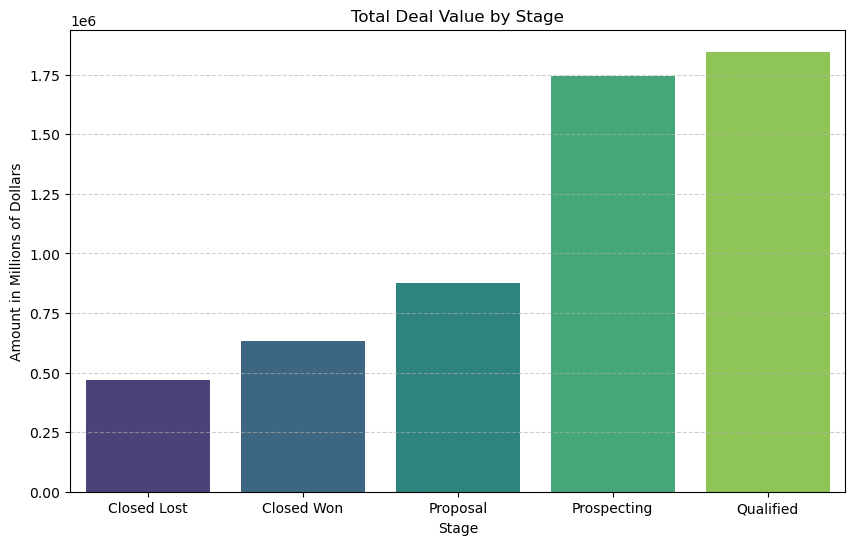

In [85]:
import matplotlib.pyplot as plt
import seaborn as sns
stage_deal_totals_reset = stage_deal_totals2.reset_index()
plt.figure(figsize=(10,6))
sns.barplot(
    data=stage_deal_totals_reset,
    x="Stage",
    y="Total_Deal_Size",
    hue="Stage",
    dodge=False,
    palette="viridis"
)
plt.title("Total Deal Value by Stage")
plt.xlabel("Stage")
plt.ylabel("Amount in Millions of Dollars")
plt.xticks(rotation=0)
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.show()

In [99]:
# stage distribution & counts
stage_distribution = sales_outreach_df["Stage"].value_counts(normalize=True)*100
display(stage_distribution)
stage_counts = sales_outreach_df["Stage"].value_counts()
print(stage_counts)


Stage
Qualified      35.0
Prospecting    29.5
Proposal       16.5
Closed Won      9.5
Closed Lost     9.5
Name: proportion, dtype: float64

Stage
Qualified      70
Prospecting    59
Proposal       33
Closed Won     19
Closed Lost    19
Name: count, dtype: int64


In [103]:
stage_engagement = sales_outreach_df.groupby(["Stage", "Region"]).agg(
    Engagement_Level=("Engagement_Score", "mean")
)
display(stage_engagement)

# here we've used the tuple .agg() operation again. The data in this csv seems a bit limited so will park it here and begin anew

Engagement_Level
Stage       Region                         
Closed Lost Asia                  51.500000
            Europe                45.750000
            North America         63.500000
            South America         42.555556
Closed Won  Asia                  71.666667
            Europe                64.500000
            North America         64.600000
            South America         52.333333
Proposal    Asia                  47.636364
            Europe                31.166667
            North America         49.125000
            South America         52.875000
Prospecting Asia                  50.538462
            Europe                47.357143
            North America         45.750000
            South America         50.050000
Qualified   Asia                  56.952381
            Europe                65.714286
            North America         41.500000
            South America         41.666667